In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

print('Версия pandas:', pd.__version__)

Версия pandas: 2.1.4


# Агрегирование и группировка данных. Часть 2

# Методы AGGREGATE (AGG), FILTER, TRANSFORM, APPLY

    План урока
    
    1. Вспоминаем основы группировки данных в pandas
    1.1 Простые примеры группировки (Метод groupby)
    1.2 Отсутствующие значения в группирующем столбце (dropna=False)
    
    2. Другие способы задать ключ(и) разбиения:
    2.1 Список, массив, объект Series и индекс как ключи группировки
    2.2 Словарь или объект Series, связывающий индекс и группу
    2.3 Любая функция на Python
    2.4 Комбинация вариантов ключей
    
    3. Итерирование
    
    4. Метод size()
    
    5. Метод nth(). Возврат записей с одинаковой позицией в каждой группе
    
    6. Метод get_group(). Получаем все данные выбранной группы
        
    7. Методы AGGREGATE (AGG), FILTER, TRANSFORM, APPLY
    7.1 Агрегирование - Метод agg()
    7.2 Фильтрация - Метод filter()
    7.3 Преобразование - Метод transform() vs Метод apply()

# 1. Вспоминаем основы группировки данных в pandas

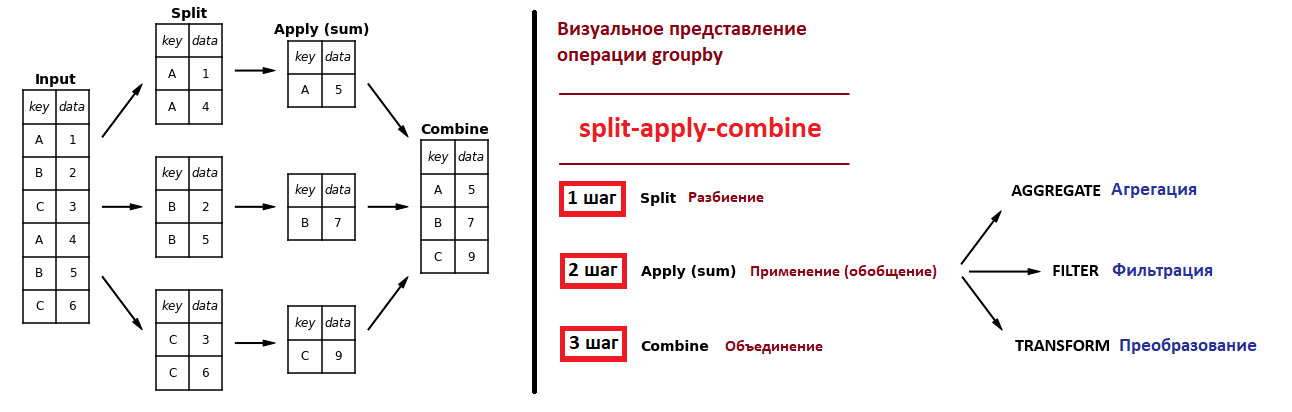

In [4]:
Image('files/groupby_(split-apply-combine).png')

In [5]:
df = pd.DataFrame({'key1': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'key2': ['yes', 'yes', 'no', 'no', 'no', 'yes'],
                   'data1': range(6),
                   'data2': np.random.randint(0,10, 6)})
df

,key1,key2,data1,data2
0,A,yes,0,0
1,B,yes,1,1
2,C,no,2,5
3,A,no,3,5
4,B,no,4,6
5,C,yes,5,1


## 1.1 Простые примеры группировки (метод groupby)

In [6]:
# создание объекта DataFrameGroupBy
df.groupby(['key1'])

#### Пример 1.1

In [7]:
# выбираем группирующий столбец ('key1')
# выбираем столбцы для агрегации (['data1','data2'])
# выбираем агрегирующую функцию sum()

df.groupby('key1')[['data1','data2']].sum()

,data1,data2
key1,,
A,3,5
B,5,7
C,7,6


#### Пример 1.2.1

In [8]:
# выбираем группирующий столбец ('key1')
# выбираем столбцы для агрегации (['data1','data2'])
# используем метод agg(), выбираем несколько агрегирующих функций (['sum', 'mean'])

df.groupby('key1')[['data1','data2']].agg(['sum', 'mean'])

data1      data2     
       sum mean   sum mean
key1                      
A        3  1.5     5  2.5
B        5  2.5     7  3.5
C        7  3.5     6  3.0

#### Пример 1.2.2

_Alias - короткое, удобное для запоминания имя, использующееся вместо более длинного и сложного имени_

_agg is an alias for aggregate_

In [9]:
# выбираем группирующий столбец ('key1')
# выбираем столбцы для агрегации (['data1','data2'])
# используем метод aggregate(), выбираем несколько агрегирующих функций (['sum', 'mean'])

df.groupby('key1')[['data1','data2']].aggregate(['sum', 'mean'])

data1      data2     
       sum mean   sum mean
key1                      
A        3  1.5     5  2.5
B        5  2.5     7  3.5
C        7  3.5     6  3.0

#### Пример 1.3.1

In [10]:
df.groupby('key1')[['data1','data2']].agg({'data1':'sum', 'data2':'mean'})

,data1,data2
key1,,
A,3,2.5
B,5,3.5
C,7,3.0


#### Пример 1.3.2

In [11]:
df.groupby('key1')[['data1','data2']].agg(
    data1_sum = pd.NamedAgg(column='data1', aggfunc='sum'),
    data2_mean = pd.NamedAgg(column='data2', aggfunc='mean'))

,data1_sum,data2_mean
key1,,
A,3,2.5
B,5,3.5
C,7,3.0


#### Пример 1.4

In [12]:
# выбираем несколько группирующих столбцов (['key1','key2'])
# по умолчанию агрегация производится по всем остальным столбцам ('data1','data2')
# выбираем агрегирующую функцию sum()

df.groupby(['key1','key2']).sum()

data1  data2
key1 key2              
A    no        3      5
     yes       0      0
B    no        4      6
     yes       1      1
C    no        2      5
     yes       5      1

#### Пример 1.5

In [13]:
# указываем группирующие столбцы в другом порядке (['key2','key1'])

df.groupby(['key2', 'key1']).sum()

data1  data2
key2 key1              
no   A         3      5
     B         4      6
     C         2      5
yes  A         0      0
     B         1      1
     C         5      1

## 1.2 Отсутствующие значения в группирующем столбце
## Аргумент dropna=False метода .groupby()

In [14]:
df_nan = pd.DataFrame({'key1': ['a', 'a', None, 'b', 'b', 'a', None],
                   'data1' : pd.Series([1, 2, 1, 2, 1, None, 1], dtype='Int64'),
                   'data2' : np.random.standard_normal(7),
                   'data3' : np.random.standard_normal(7)})
df_nan

,key1,data1,data2,data3
0,a,1,1.357423,-0.688648
1,a,2,1.349333,-0.047256
2,None,1,1.264908,0.196556
3,b,2,-1.261883,1.347772
4,b,1,-2.122606,-0.879808
5,a,<NA>,0.417378,-0.219293
6,None,1,-1.525406,0.553795


#### Пример 1.6

In [15]:
df_nan.groupby('key1').sum()

,data1,data2,data3
key1,,,
a,3,3.124134,-0.955197
b,3,-3.384489,0.467964


In [16]:
df_nan.groupby('key1', dropna=False).sum()

,data1,data2,data3
key1,,,
a,3,3.124134,-0.955197
b,3,-3.384489,0.467964
NaN,2,-0.260498,0.750351


# 2. Другие способы задать ключ(и) разбиения

In [17]:
# создаем DataFrame df_2 из среза df (колонка 'key2' нам не нужна)
# устанавливаем колонку 'key1' в качестве индекса, изменяя исходный объект

df_2 = df.iloc[:,[0,2,3] ]
df_2.set_index('key1', inplace=True)
display(df, df_2)

,key1,key2,data1,data2
0,A,yes,0,0
1,B,yes,1,1
2,C,no,2,5
3,A,no,3,5
4,B,no,4,6
5,C,yes,5,1


,data1,data2
key1,,
A,0,0
B,1,1
C,2,5
A,3,5
B,4,6
C,5,1


## 2.1 Список, массив, объект Series и индекс как ключи группировки

    Ключ группировки может быть любым рядом или списком такой же длины, что и объект DataFrame.

#### Пример 2.1.1

In [18]:
# создаем список такой же длины

lg = ['group 1', 'group 2' , 'group 1', 'group 2', 'group 3', 'group 1']

df.groupby(lg)[['key1', 'data1', 'data2']].sum()

,key1,data1,data2
group 1,ACC,7,6
group 2,BA,4,6
group 3,B,4,6


#### Пример 2.1.2

In [19]:
# создаем список такой же длины

lg = ['group 1', 'group 2' , 'group 1', 'group 2', 'group 3', 'group 1']

df_2.groupby(lg).sum()

,data1,data2
group 1,7,6
group 2,4,6
group 3,4,6


_Используем атрибут groups, чтобы получить словарь_

    {группа 1:[индексы/метки строк], группа 2:[индексы/метки строк]}

In [20]:
# с помощью атрибута groups мы видим каким группам принадлежат определенные строки изначального объекта DataFrame  

df.groupby(lg).groups

{'group 1': [0, 2, 5], 'group 2': [1, 3], 'group 3': [4]}

In [21]:
df_2.groupby(lg).groups

{'group 1': ['A', 'C', 'C'], 'group 2': ['B', 'A'], 'group 3': ['B']}

#### Пример 2.1.3

In [22]:
# используем несколько списков той же длины

lg_1 = ['part 2', 'part 1' , 'part 1', 'part 2', 'part 1', 'part 1']
lg_2 = ['group 1', 'group 2' , 'group 1', 'group 2', 'group 3', 'group 1']
df_2.groupby([lg_1,lg_2]).sum()

data1  data2
part 1 group 1      7      6
       group 2      1      1
       group 3      4      6
part 2 group 1      0      0
       group 2      3      5

#### Пример 2.2

In [23]:
# создаем серию такой же длины

sg = pd.Series(['group 1', 'group 2' , 'group 1', 'group 2', 'group 3', 'group 1'])
df.groupby(sg)[['key1', 'data1', 'data2']].sum()

,key1,data1,data2
group 1,ACC,7,6
group 2,BA,4,6
group 3,B,4,6


#### Пример 2.3

In [24]:
# создаем массив numpy такой же длины

ag = np.array(['group 1', 'group 2' , 'group 1', 'group 2', 'group 3', 'group 1'])
df.groupby(ag)[['key1', 'data1', 'data2']].sum()

,key1,data1,data2
group 1,ACC,7,6
group 2,BA,4,6
group 3,B,4,6


#### Пример 2.4.1

In [25]:
# используем индекс как ключ группировки

df_2.groupby(df_2.index).sum()

,data1,data2
key1,,
A,3,5
B,5,7
C,7,6


#### Пример 2.4.2

In [26]:
# используем индекс как ключ группировки

df_2.groupby('key1').sum()

,data1,data2
key1,,
A,3,5
B,5,7
C,7,6


## 2.2 Словарь или объект Series, связывающий индекс и группу (mapping)

#### Пример 2.5

In [27]:
display(df_2)
# словарь в переменной mapping

mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df_2.groupby(mapping).sum()

,data1,data2
key1,,
A,0,0
B,1,1
C,2,5
A,3,5
B,4,6
C,5,1


,data1,data2
key1,,
consonant,12,13
vowel,3,5


## 2.3 Любая функция на Python

#### Пример 2.6

In [28]:
df_2.groupby(str.lower).mean()

,data1,data2
key1,,
a,1.5,2.5
b,2.5,3.5
c,3.5,3.0


## 2.4 Комбинация вариантов ключей

#### Пример 2.7.1

In [29]:
df_2.groupby([str.lower, mapping]).mean()

,,data1,data2
key1,key1,,
a,vowel,1.5,2.5
b,consonant,2.5,3.5
c,consonant,3.5,3.0


#### Пример 2.7.2

In [30]:
df_2.groupby([mapping, str.lower]).mean()

data1  data2
key1      key1              
consonant b       2.5    3.5
          c       3.5    3.0
vowel     a       1.5    2.5

## 3. Итерирование

#### Пример 3.1

In [31]:
for name, group in df.groupby('key1'):
    print(name)
    display(group)
    print()

A


,key1,key2,data1,data2
0,A,yes,0,0
3,A,no,3,5



B


,key1,key2,data1,data2
1,B,yes,1,1
4,B,no,4,6



C


,key1,key2,data1,data2
2,C,no,2,5
5,C,yes,5,1


#### Пример 3.2

In [32]:
# если несколько группирующих столбцов

df.groupby(['key1', 'key2']).groups.keys()

dict_keys([('A', 'no'), ('A', 'yes'), ('B', 'no'), ('B', 'yes'), ('C', 'no'), ('C', 'yes')])

In [33]:
for name, group in df.groupby(['key1', 'key2']):
    print(name)
    display(group)
    print()

('A', 'no')


,key1,key2,data1,data2
3,A,no,3,5



('A', 'yes')


,key1,key2,data1,data2
0,A,yes,0,0



('B', 'no')


,key1,key2,data1,data2
4,B,no,4,6



('B', 'yes')


,key1,key2,data1,data2
1,B,yes,1,1



('C', 'no')


,key1,key2,data1,data2
2,C,no,2,5



('C', 'yes')


,key1,key2,data1,data2
5,C,yes,5,1


#### Открываем файл subset-covid-data.csv

In [34]:
df_covid=pd.read_csv('files/subset-covid-data.csv')
df_covid.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [35]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [36]:
df_covid['date'].value_counts()

date
2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: count, dtype: int64

In [37]:
print(df_covid['continent'].nunique())
print(df_covid['country'].nunique())

6
206


In [38]:
df_covid['continent'].value_counts()

continent
Europe     54
Africa     52
America    49
Asia       42
Oceania     8
Other       1
Name: count, dtype: int64

## 4. Метод size()

In [39]:
grouped_covid = df_covid.groupby('continent')

#### Пример 4.1

In [40]:
grouped_covid.size()

continent
Africa     52
America    49
Asia       42
Europe     54
Oceania     8
Other       1
dtype: int64

## 5. Метод nth(). Возврат записей с одинаковой позицией в каждой группе

#### Пример 5

In [41]:
df_covid.groupby('continent').nth(3)

,country,continent,date,day,month,year,cases,deaths,country_code,population
9,Aruba,America,2020-04-12,12,4,2020,6,0,ABW,105845.0
11,Austria,Europe,2020-04-12,12,4,2020,247,18,AUT,8847037.0
22,Bhutan,Asia,2020-04-12,12,4,2020,0,0,BTN,754394.0
26,Botswana,Africa,2020-04-12,12,4,2020,0,0,BWA,2254126.0
80,Guam,Oceania,2020-04-12,12,4,2020,3,1,GUM,165768.0


## 6. Метод get_group(). Получаем все данные выбранной группы

#### Пример 6

In [42]:
df_covid.groupby('continent').get_group('Europe').head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
8,Armenia,Europe,2020-04-12,12,4,2020,30,2,ARM,2951776.0
11,Austria,Europe,2020-04-12,12,4,2020,247,18,AUT,8847037.0
12,Azerbaijan,Europe,2020-04-12,12,4,2020,67,1,AZE,9942334.0


## 7. Методы AGGREGATE (AGG), FILTER, TRANSFORM, APPLY

## 7.1 Агрегирование - Метод agg()

    Список самых распространенных функций:
    
    count - количество ненулевых значений
    min - минимум
    max - максимум
    std - стандартное отклонение 
    sum - сумма
    mean - среднее
    median - медиана
    var - дисперсия
    quantile - квантиль

#### Пример 7.1

In [43]:
df_2.groupby('key1').sum()

,data1,data2
key1,,
A,3,5
B,5,7
C,7,6


#### Пример 7.2

In [44]:
# df_2.groupby('key1').agg(sum) - предупреждение! РЕКОМЕНДУЕТСЯ использовать .agg('sum')
# df_2.groupby('key1').agg(np.sum) - предупреждение! РЕКОМЕНДУЕТСЯ использовать .agg('sum')
# df_2.groupby('key1').agg('sum')

# df_2.groupby('key1').agg(['sum', 'mean'])

# df_2.groupby('key1').agg({'data1':'sum', 'data2':'mean'})

# df_2.groupby('key1').agg(
#    data1_sum = pd.NamedAgg(column='data1', aggfunc='sum'),
#    data2_mean = pd.NamedAgg(column='data2', aggfunc='mean'))

df_2.groupby('key1').agg('sum')

,data1,data2
key1,,
A,3,5
B,5,7
C,7,6


#### Пример 7.3

In [45]:
df_2.groupby('key1')[['data1']].describe()

data1                                         
     count mean      std  min   25%  50%   75%  max
key1                                               
A      2.0  1.5  2.12132  0.0  0.75  1.5  2.25  3.0
B      2.0  2.5  2.12132  1.0  1.75  2.5  3.25  4.0
C      2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0

#### Пример 7.4

In [46]:
df_2.groupby('key1')['data1'].describe()

,count,mean,std,min,25%,50%,75%,max
key1,,,,,,,,
A,2.0,1.5,2.12132,0.0,0.75,1.5,2.25,3.0
B,2.0,2.5,2.12132,1.0,1.75,2.5,3.25,4.0
C,2.0,3.5,2.12132,2.0,2.75,3.5,4.25,5.0


## 7.2 Фильтрация - Метод filter()

_Метод filter удаляет или отфильтровывает группы на основе определенного условия. То есть он возвращает меньшее количество записей по сравнению с входным объектом._

_В то время как метод agg (aggregate) возвращает ОДНО значение для каждой группы, метод filter возвращает все записи группы в зависимости от того, выполняется ли условие. То есть операция фильтрации позволяет отбрасывать данные в зависимости от свойств группы._

In [47]:
df_3 = pd.DataFrame({'key1': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': [2, 6, 4, 6, 0, 7]})
df_3

,key1,data1
0,A,2
1,B,6
2,C,4
3,A,6
4,B,0
5,C,7


#### Пример 7.5

In [48]:
# создаем собственную функцию filter_func для фильтрации сгруппированных данных
# Функция filter возвращает булево значение, определяющее, прошла ли группа фильтрацию.

def filter_func(x):
    return x['data1'].std() < 3

display(df_3.groupby('key1')[['data1']].std(),
        df_3.groupby('key1').filter(filter_func))

,data1
key1,
A,2.828427
B,4.242641
C,2.121320


,key1,data1
0,A,2
2,C,4
3,A,6
5,C,7


In [49]:
print('Стандартное отклонение (std)', '\n')
for name, group in df_3.groupby('key1'):
    print(f'по группе "{name}" :', group['data1'].std())
    print('Результат:', filter_func(group))
    print()

Стандартное отклонение (std) 

по группе "A" : 2.8284271247461903
Результат: True

по группе "B" : 4.242640687119285
Результат: False

по группе "C" : 2.1213203435596424
Результат: True



In [50]:
# получаем только те строки датафрейма df_3, которые относятся к группам, прошедшим фильтрацию (группы А и C)

df_3.groupby('key1').filter(filter_func)

,key1,data1
0,A,2
2,C,4
3,A,6
5,C,7


#### Пример 7.6

In [51]:
grouped_continents = df_covid.groupby('continent')
filter_result = grouped_continents.filter(lambda x:x['deaths'].mean()>=40)

# возвращаются только строки для групп 'Europe' и 'America',  
# Только эти две группы удовлетворяют условию (средний уровень смертности в группе больше 40)

print(filter_result['continent'].unique())
filter_result.head(10)

['Europe' 'America']


,country,continent,date,day,month,year,cases,deaths,country_code,population
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
5,Anguilla,America,2020-04-12,12,4,2020,0,0,NaN,NaN
6,Antigua_and_Barbuda,America,2020-04-12,12,4,2020,0,0,ATG,96286.0
7,Argentina,America,2020-04-12,12,4,2020,162,7,ARG,44494502.0
8,Armenia,Europe,2020-04-12,12,4,2020,30,2,ARM,2951776.0
9,Aruba,America,2020-04-12,12,4,2020,6,0,ABW,105845.0
11,Austria,Europe,2020-04-12,12,4,2020,247,18,AUT,8847037.0
12,Azerbaijan,Europe,2020-04-12,12,4,2020,67,1,AZE,9942334.0
13,Bahamas,America,2020-04-12,12,4,2020,4,0,BHS,385640.0


## 7.3 Преобразование - Метод transform() vs Метод apply()

_Метод transform, также как и метод apply можно использовать с любыми объектом Series или DataFrame, а не только с объектами groupby._

## 7.3.1 Метод transform()

Особенности:

_Метод transform возвращает то же количество записей, что и входной объект. То есть он возвращает объект, который имеет те же строки, что и исходный DataFrame или Series, и аналогично индексируется._

_Создание нового столбца из существующего - одно из распространенных применений метода transform._

_Метод transform можно использовать с любыми объектом Series или DataFrame, а не только с объектами groupby._

#### Пример 7.7

In [52]:
# создаем новую колонку с общим количеством стран соответсвующего континента
df_covid['country_counts'] = df_covid.groupby('continent')['country'].transform(lambda x:x.count())
df_covid.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population,country_counts
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0,42
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0,54
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0,52
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0,54
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0,52


#### Пример 7.8

In [53]:
# Часто метод transform используется для заполнения отсутсвующих значений
print(df_covid.info(), '\n\n')
df_covid.transform(lambda x:x.fillna(0)).info()
# метод transform  не поменял изначальную структуру датафрейма df_covid , а вернул нам копию без пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         206 non-null    object 
 1   continent       206 non-null    object 
 2   date            206 non-null    object 
 3   day             206 non-null    int64  
 4   month           206 non-null    int64  
 5   year            206 non-null    int64  
 6   cases           206 non-null    int64  
 7   deaths          206 non-null    int64  
 8   country_code    202 non-null    object 
 9   population      202 non-null    float64
 10  country_counts  206 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 17.8+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         206 non-null    object 

## Еще несколько примеров, как использовать вместе методы groupby() и transform()

#### Способ 1: используйте groupby() и transform() со встроенной функцией

    df['new'] = df.groupby('group_var')['value_var'].transform('mean')

#### Способ 2: используйте groupby() и transform() с пользовательской функцией

    df['new'] = df.groupby('group_var')['value_var'].transform (lambda x: some function)

In [54]:
#создадим DataFrame с результатами спортивного состязания

df_sport = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
 'points': [30, 22, 19, 14, 14, 11, 20, 28]})

display(df_sport)

,team,points
0,A,30
1,A,22
2,A,19
3,A,14
4,B,14
5,B,11
6,B,20
7,B,28


_Использование groupby() и transform() со встроенной функцией_

#### Пример 7.9.1

In [55]:
#создаем новую колонку mean_points
df_sport['mean_points'] = df_sport.groupby('team')['points'].transform('mean')

#смотрим на обновленную структуру
display(df_sport)

,team,points,mean_points
0,A,30,21.25
1,A,22,21.25
2,A,19,21.25
3,A,14,21.25
4,B,14,18.25
5,B,11,18.25
6,B,20,18.25
7,B,28,18.25


#### Пример 7.9.2

In [56]:
# создаем новую колонку sum_points
df_sport['sum_points'] = df_sport.groupby('team')['points'].transform('sum')

#смотрим на обновленную структуру
display(df_sport)

,team,points,mean_points,sum_points
0,A,30,21.25,85
1,A,22,21.25,85
2,A,19,21.25,85
3,A,14,21.25,85
4,B,14,18.25,73
5,B,11,18.25,73
6,B,20,18.25,73
7,B,28,18.25,73


_Использование groupby() и transform() с пользовательской функцией_

#### Пример 7.10

In [57]:
# создаем новую колонку called percent_of_points
df_sport['percent_of_points'] = df_sport.groupby('team')['points'].transform(lambda x: x/x.sum())

# смотрим на обновленную структуру
display(df_sport)

,team,points,mean_points,sum_points,percent_of_points
0,A,30,21.25,85,0.352941
1,A,22,21.25,85,0.258824
2,A,19,21.25,85,0.223529
3,A,14,21.25,85,0.164706
4,B,14,18.25,73,0.191781
5,B,11,18.25,73,0.150685
6,B,20,18.25,73,0.273973
7,B,28,18.25,73,0.383562


## 7.3.2 Метод apply()

Особенности:

_Метод apply дает возможность применить произвольную функцию к результатам группировки._ 

_Метод apply может возвращать одиночное (скалярное) значение, серию или DataFrame, и выходной результат не обязательно должен иметь ту же структуру, что и входной._

_Разница между методами apply и transform заключается в том, что метод apply более гибкий, поскольку может возвращать объект любой формы, в то время как метод transform должен возвращать объект той же формы._

_Кроме того, если метод transform применяет функцию к каждому столбцу группы, то метод apply применяет функцию ко всей группе._

_Метод apply, подобно методу transform, может использоваться не только с объектом groupby, но и с объектами Series и DataFrame._

#### Пример 7.11

In [58]:
df_covid.groupby('continent').apply(lambda x:x.isna().sum())

,country,continent,date,day,month,year,cases,deaths,country_code,population,country_counts
continent,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,1,0
America,0,0,0,0,0,0,0,0,3,3,0
Asia,0,0,0,0,0,0,0,0,0,0,0
Europe,0,0,0,0,0,0,0,0,0,0,0
Oceania,0,0,0,0,0,0,0,0,0,0,0
Other,0,0,0,0,0,0,0,0,1,0,0


# Apply vs Transform в Pandas. Выбор правильного инструмента

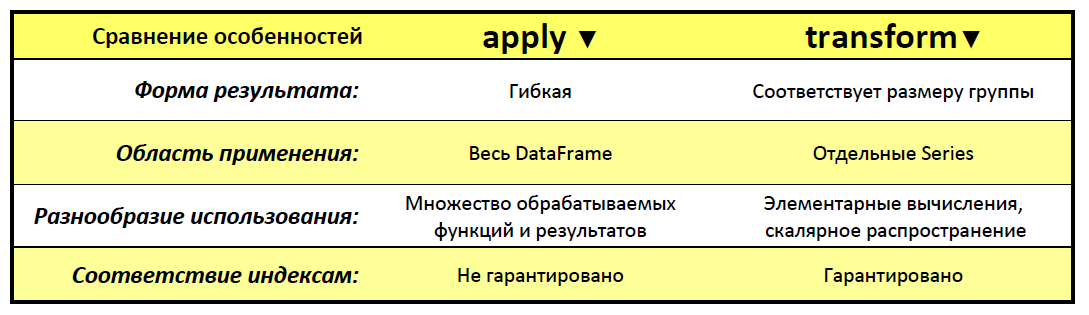

In [3]:
Image('files/apply_vs_transform.png')

### Рекомендации

1. Применяйте transform, если вам нужно провести вычисления, сохраняя индексы и формат исходных данных. Он подходит для элементарных вычислений в группах и распределения скалярных значений по датафреймам. Результат должен быть либо серией той же длины, что и группа, либо одним скалярным значением.

2. Apply обладает универсальностью и позволяет выполнять операции над несколькими столбцами в группе, возвращать результаты различной длины и применять пользовательские функции. Он обрабатывает целые группы, что идеально подходит для агрегирующих операций или выборок подмножеств данных. Apply позволяет реализовать сложные вычисления и возвращать результаты в виде Series, DataFrames или скаляров, в зависимости от конструкции функции.

    в следующих уроках мы рассмотрим:
    
    pd.Grouper (для работы с группами временных рядов - datetime)
    Иерархическое индексирование (MultiIndex)
    Таблицы сопряженности (Crosstab) и сводные таблицы (Pivot table)